In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import *
from copy import deepcopy


# 1. Data

## 1.1. Loading

In [2]:
df_Iris = pd.read_csv("Iris.csv")
df_Iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### 1.1.2 Plotting (SepalLengthCm, SepalWidthCm)

In [3]:
SepalLengthCm = df_Iris['SepalLengthCm']
SepalWidthCm = df_Iris['SepalWidthCm']
Lables = df_Iris['Species']


SepalLengthCm = SepalLengthCm.to_numpy()
SepalWidthCm = SepalWidthCm.to_numpy()
Lables = Lables.to_numpy()

for i in range(Lables.shape[0]):
    if Lables[i] == 'Iris-setosa':
        Lables[i] = 0
    elif Lables[i] == 'Iris-versicolor':
        Lables[i] = 1
    else:
        Lables[i] = 2

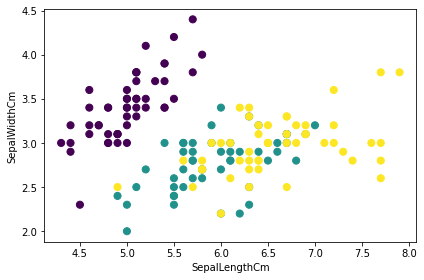

In [4]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True




fig = plt.figure()
ax = fig.add_subplot(111)

scatter = ax.scatter(SepalLengthCm, SepalWidthCm, c=Lables, s=50)
ax.set_xlabel("SepalLengthCm")
ax.set_ylabel("SepalWidthCm")
plt.show()

## 1.2. Preprocessing

### 1.2.1. Shuffeling

In [5]:
df_Iris = df_Iris.sample(frac=1)
df_Iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
101,102,5.8,2.7,5.1,1.9,2
19,20,5.1,3.8,1.5,0.3,0
67,68,5.8,2.7,4.1,1.0,1
71,72,6.1,2.8,4.0,1.3,1
121,122,5.6,2.8,4.9,2.0,2
...,...,...,...,...,...,...
80,81,5.5,2.4,3.8,1.1,1
40,41,5.0,3.5,1.3,0.3,0
94,95,5.6,2.7,4.2,1.3,1
149,150,5.9,3.0,5.1,1.8,2


### 1.2.1. Feature and lables

In [6]:
X = df_Iris.drop(columns=['Id', 'Species'], axis=1)
Y = df_Iris['Species']
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
101,5.8,2.7,5.1,1.9
19,5.1,3.8,1.5,0.3
67,5.8,2.7,4.1,1.0
71,6.1,2.8,4.0,1.3
121,5.6,2.8,4.9,2.0
...,...,...,...,...
80,5.5,2.4,3.8,1.1
40,5.0,3.5,1.3,0.3
94,5.6,2.7,4.2,1.3
149,5.9,3.0,5.1,1.8


### 1.2.2. Convert To Numpy

In [7]:
X = X.to_numpy()


# 2. K-Means Clustering

## 2.1. Helper functions

In [8]:
def Check (Points, Prev_points,Number_of_features):
    No_Change = True

    for i in range (len(Points)):
        if Points[i][Number_of_features] != Prev_points[i][Number_of_features]:
            No_Change = False
            break

    return No_Change


In [9]:
def Euclid_distance (point1, point2):
    

    return float(np.linalg.norm(point1 - point2))

In [10]:
def Update_centers (k, Points,Number_of_features):

    new_centers = np.full((k,Number_of_features),999)
    new_centers = new_centers.tolist()
        
    for k_ in range (k):

        for c in range (Number_of_features):

            summ = 0
            count = 0


            for r in range (len(Points)):
                

                if Points[r][Number_of_features] == k_:
                    
                    summ = summ + Points[r][c]
                    count = count + 1

            new_centers[k_][c] = summ / count

    return new_centers



## 2.2. K-Means Model

In [11]:
def k_Means (Points, k):

    number_of_features = Points.shape[1]
    print("Number of features", number_of_features)
    Points = Points.tolist()

    c = 0
    distance_list = np.full((len(Points),k),999)
    distance_list = distance_list.tolist()
    
    No_Change = False

    # first iteration

    print("First iteration")

    # Calculate distance
    for i in range (len(Points)):

        for j in range (k):

            Centroid = Points[j]

            Cluster = j

            distance = Euclid_distance (Centroid, np.asarray(Points[i]))
            
            
            distance_list[i][j] = distance
    
    print ("Distance list \n",distance_list)

    # cluster The points

    for i in range (len(distance_list)):

        cluster = distance_list[i].index(min (distance_list[i]))

        Points[i].append(cluster)

    print ("Points after clustering \n",Points)

    # update the centers

    new_centers = Update_centers (k, Points,number_of_features)
    print("new Centers after first iteration \n", new_centers)

    print("---------------------------------------------------------")

    # the rest of iterations

    while No_Change == False:

        print("iteration :- ")

        prev_points = deepcopy(Points)

        prev_points = deepcopy(Points)
        print("Previous Points:\n")
        print(prev_points)

        # calculate distance

        for i in range (len(Points)):
            for j in range (k):
                distance = Euclid_distance (np.asarray(new_centers[j]), np.delete(np.asarray(Points[i]).reshape(1,number_of_features+1),2,1))
                distance_list[i][j] = distance

        print ("Distance list \n",distance_list)

        # Cluster The points

        for i in range (len(distance_list)):

            cluster = distance_list[i].index(min (distance_list[i]))

            Points[i][2]=cluster
        
        print ("Points after clustering \n",Points)

        # Check if there is no change

        No_Change = Check (Points, prev_points, number_of_features)

        print("There is No_Change ? ",No_Change)
        
        
        # Update Centers
        new_centers = Update_centers (k, Points,number_of_features)
                
        print("=======================================================================================")
    
    return np.asarray(Points)



In [12]:
Points = np.array([[0,0], [2,0], [2,2], [0,2], [4,4], [4,6], [6,4], [6,8]])

In [13]:
X = k_Means (X, 3)

Number of features 4
First iteration
Distance list 
 [[0.0, 4.149698784249285, 1.345362404707371], [4.149698784249285, 0.0, 2.991655060330318], [1.345362404707371, 2.991655060330318, 0.0], [1.2922847983320083, 3.0413812651491097, 0.4472135954999577], [0.31622776601683755, 3.9623225512317903, 1.3000000000000005], [1.2247448713915896, 4.709564735726648, 2.0663978319771834], [4.180908992073374, 0.8366600265340752, 2.971531591620725], [1.3747727084867523, 5.028916384272064, 2.4454038521274972], [0.6999999999999998, 4.016217125604641, 1.0862780491200221], [1.077032961426901, 4.969909455915671, 2.215851980616034], [0.734846922834953, 3.641428291206625, 0.8062257748298551], [4.177319714841084, 0.8660254037844384, 2.9999999999999996], [4.31045241245046, 1.1489125293076052, 3.1511902513177454], [0.6782329983125268, 4.1303752856126765, 1.1618950038622253], [2.7055498516937373, 5.894064811316551, 3.45108678534748], [1.519868415357066, 3.179622619116929, 0.5477225575051662], [4.102438299353203, 0.

# 3. Testing

## 3.1 Plot (SepalLengthCm, SepalWidthCm) with new lables

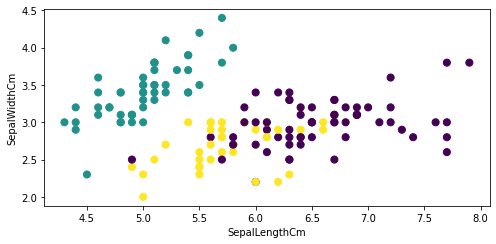

In [14]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True




fig = plt.figure()
ax = fig.add_subplot(111)

scatter = ax.scatter(X[:,0], X[:,1], c=X[:,4], s=50)
ax.set_xlabel("SepalLengthCm")
ax.set_ylabel("SepalWidthCm")
plt.show()